In [33]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df.head()
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


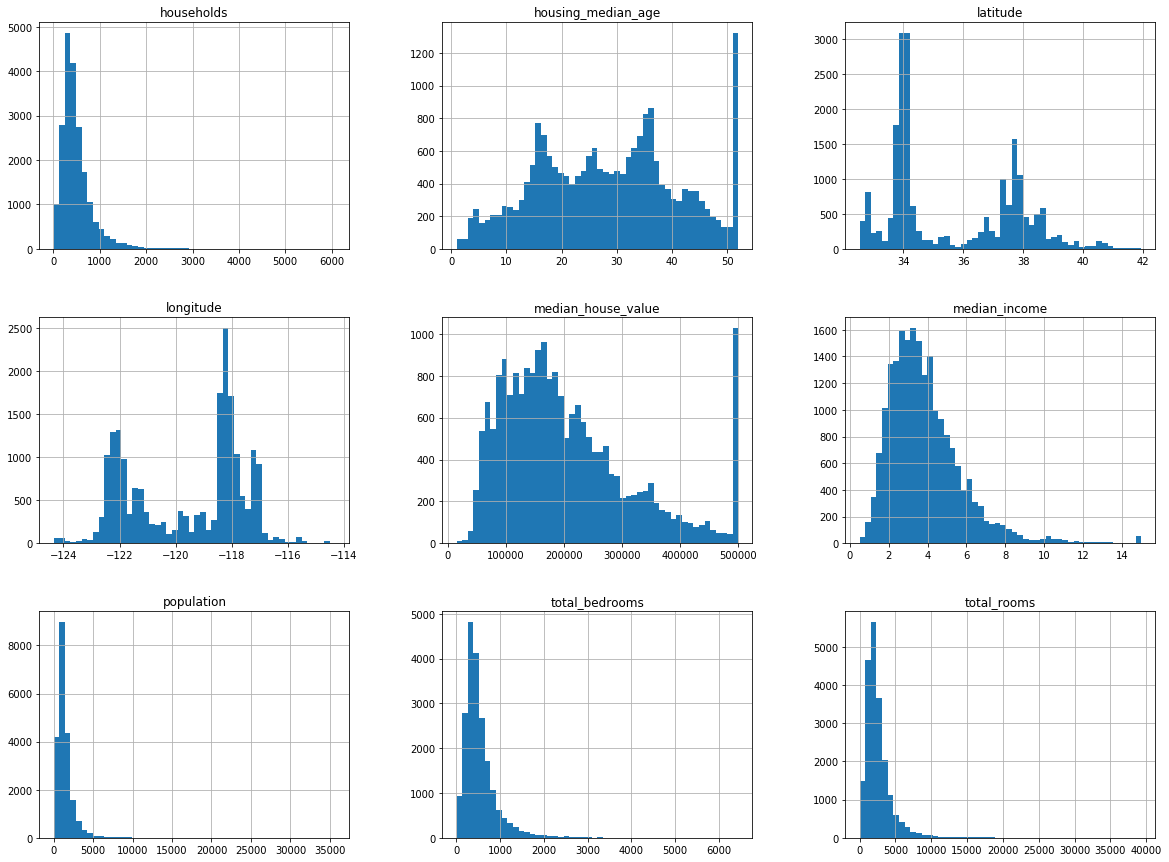

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
train_set, test_set=train_test_split(df, test_size=0.2, random_state=42)

In [9]:
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["median_income"]<5, 5.0, inplace=True)

In [10]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [11]:
df["income_cat"].value_counts()/len(df)

3.0    0.350581
2.0    0.318847
5.0    0.218459
4.0    0.072287
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [13]:
df=strat_train_set.copy()    

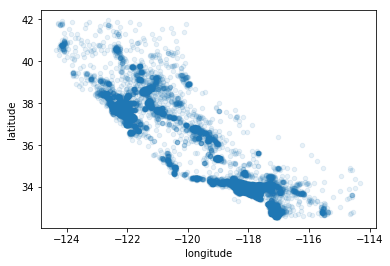

In [14]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

In [15]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="population", figsize=(10,7), c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [16]:
corr_matrix=df.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687752
total_rooms           0.136422
housing_median_age    0.106985
households            0.066340
total_bedrooms        0.050081
population           -0.024622
longitude            -0.047586
latitude             -0.142814
Name: median_house_value, dtype: float64

In [17]:
attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12,8))

C:\Users\emre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000939980FC50>,
      dtype=object)

In [18]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [19]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [20]:
corr_matrix=df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687752
rooms_per_household         0.145300
total_rooms                 0.136422
housing_median_age          0.106985
households                  0.066340
total_bedrooms              0.050081
population_per_household   -0.022435
population                 -0.024622
longitude                  -0.047586
latitude                   -0.142814
bedrooms_per_room          -0.258861
Name: median_house_value, dtype: float64

In [21]:
df=strat_train_set.drop("median_house_value", axis=1)
df_labels=strat_train_set["median_house_value"].copy()

In [22]:
imputer=Imputer(strategy="median")
df_num=df.drop("ocean_proximity", axis=1)
imputer.fit(df_num)

C:\Users\emre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [23]:
imputer.statistics_

array([-118.52  ,   34.26  ,   29.    , 2120.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [24]:
df_num.median().values

array([-118.52  ,   34.26  ,   29.    , 2120.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [25]:
X=imputer.transform(df_num)

In [26]:
df_tr=pd.DataFrame(X, columns=df_num.columns)

In [27]:
encoder=LabelEncoder()
df_cat=df["ocean_proximity"]
df_cat_encoded=encoder.fit_transform(df_cat)
df_cat_encoded

array([4, 0, 4, ..., 4, 0, 0])

In [28]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [29]:
encoder=OneHotEncoder()
df_cat_1hot=encoder.fit_transform(df_cat_encoded.reshape(-1,1))
df_cat_1hot

C:\Users\emre\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [30]:
df_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [31]:
encoder=LabelBinarizer()
df_cat_1hot=encoder.fit_transform(df_cat)
df_cat_1hot

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [32]:
lin_reg=LinearRegression()
lin_reg.fit(df_)

NameError: name 'df_' is not defined

In [34]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]